### HOMEWORK 3 

#### VAISHNAVI JAMDADE(TM39453)

### Importing numpy library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Importing required packages from Scikit

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

### Loading the breast cancer dataset using Scikit

In [3]:
dataset=load_breast_cancer()

In [4]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### What are the target labels in dataset?

In [5]:
list(dataset.target_names)

['malignant', 'benign']

### Importing required package for splitting data from scikit

In [6]:
from sklearn.model_selection import train_test_split
import collections

In [7]:
X=dataset.data

In [8]:
y=dataset.target

In [9]:
collections.Counter(y)

Counter({0: 212, 1: 357})

In [10]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### Checking total number of attributes present in dataset

In [11]:
X.shape[1]

30

### Splitting the data from dataset into half each for training and testing data for building our model : 

In [12]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.5,random_state=42)

In [13]:
X_train

array([[1.366e+01, 1.913e+01, 8.946e+01, ..., 1.407e-01, 2.744e-01,
        8.839e-02],
       [1.032e+01, 1.635e+01, 6.531e+01, ..., 2.381e-02, 2.681e-01,
        7.399e-02],
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [14]:
X_test

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [9.876e+00, 1.940e+01, 6.395e+01, ..., 9.749e-02, 2.622e-01,
        8.490e-02],
       [1.157e+01, 1.904e+01, 7.420e+01, ..., 6.664e-02, 3.035e-01,
        8.284e-02],
       [1.231e+01, 1.652e+01, 7.919e+01, ..., 8.660e-02, 2.618e-01,
        7.609e-02]])

In [15]:
y_train

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [16]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [17]:
len(X_train)

284

In [18]:
len(X_test)

285

### Running Logistic Regression using default solver and fitting our model with training data :

In [19]:
lrc=LogisticRegression(solver='liblinear').fit(X_train,y_train)

### Running our model on Test input data and storing the predicted output

In [20]:
y_pred=lrc.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

#### a) Target values

Text(0.5, 1.0, 'Target Values')

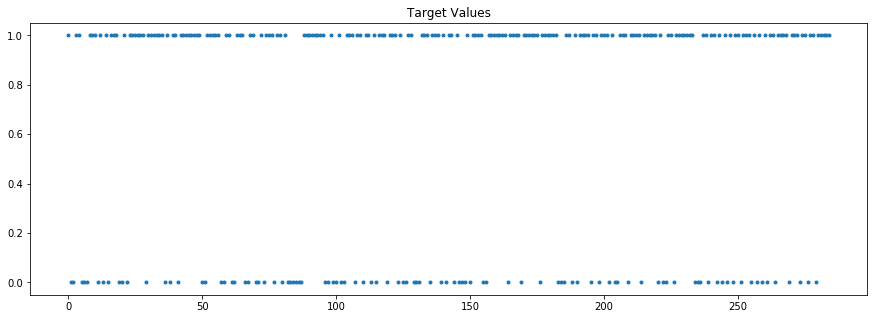

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.title('Target Values')

#### b) Predicted values

Text(0.5, 1.0, 'Predicted Values')

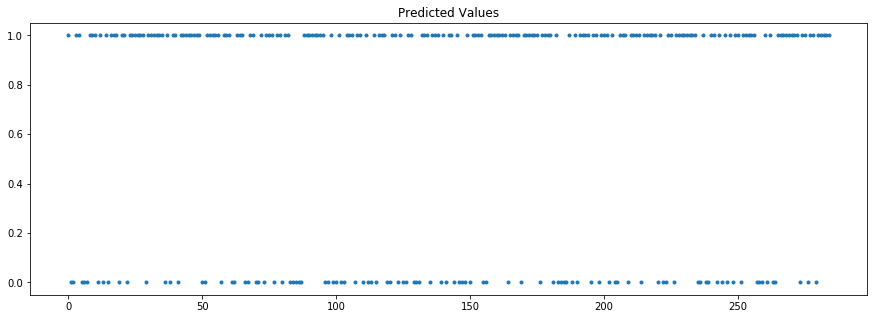

In [23]:
plt.figure(figsize=(15,5))
plt.plot(y_pred,'.')
plt.title('Predicted Values')

### Comparison of predicted values and target values of test data

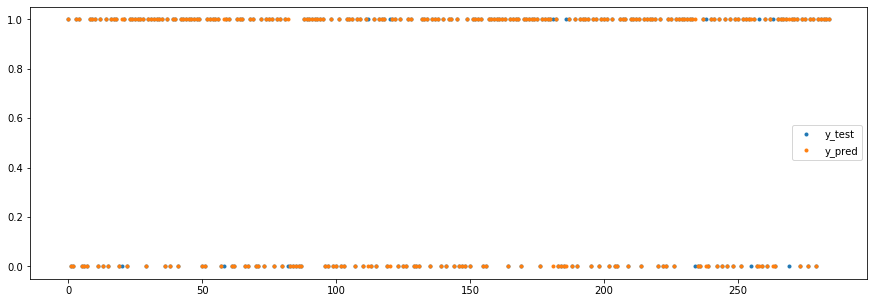

In [24]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.plot(y_pred,'.')
plt.legend(['y_test','y_pred'])

* As we can see that we obtained a high accuracy using Logistic Regression inspite of splitting the data into half training data and half testing data.

### Evaluation Metrices for Test Data

In [25]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.9543859649122807

In [26]:
print("Accuracy (test) for Logisitic Regression: %0.1f%% " % (accuracy * 100))

Accuracy (test) for Logisitic Regression: 95.4% 


### Now lets run Support Vector Machine using Linear kernel :

In [27]:
svcl=svm.SVC(kernel='linear').fit(X_train,y_train)

In [28]:
y_predSVM=svcl.predict(X_test)

In [29]:
y_predSVM

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

#### a) Target Values:

Text(0.5, 1.0, 'Target Values')

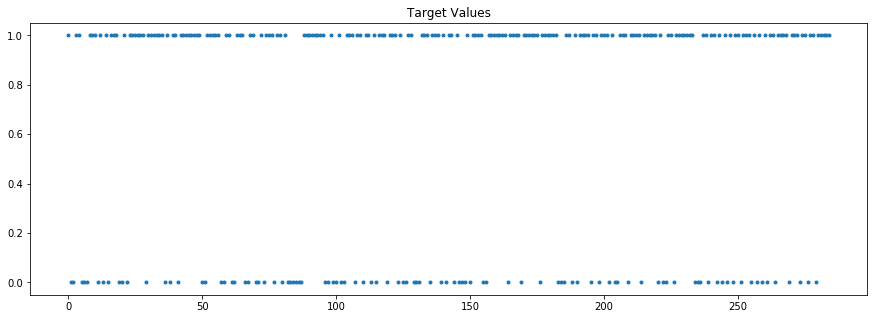

In [30]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.title('Target Values')

#### b) Predicted Values : 

Text(0.5, 1.0, 'Predicted Values')

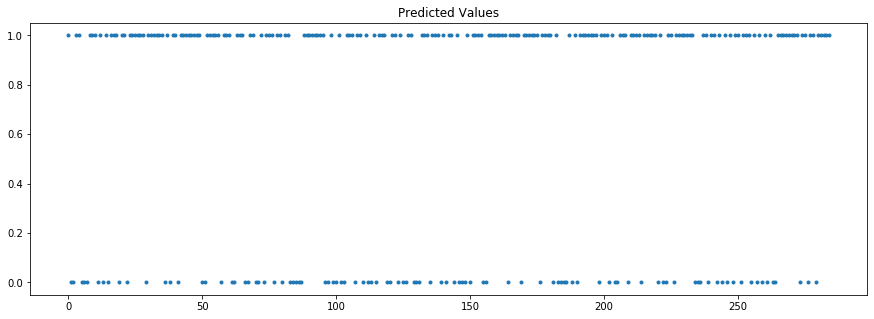

In [31]:
plt.figure(figsize=(15,5))
plt.plot(y_predSVM,'.')
plt.title('Predicted Values')

### Comparison of predicted values and target values of test data

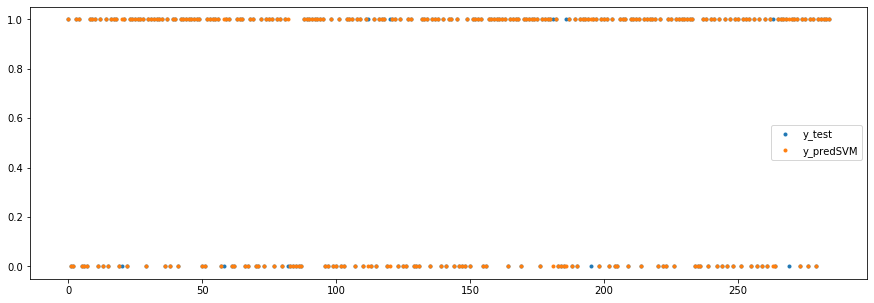

In [32]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.plot(y_predSVM,'.')
plt.legend(['y_test','y_predSVM'])

* As we can see here that most of the predicted and target values are overlapping here meaning that prediction accuracy is more when used Linear Kernel than using Logistic Regression Classifier.There are slight deviations in values which tells us that our model is very well trained and can predict output class label with better accuracy for new set of data each time.

### Accuracy Calculation for SVM using Linear Kernel :

In [33]:
accuracySVM=accuracy_score(y_test, y_predSVM)

In [34]:
accuracySVM

0.9649122807017544

In [35]:
print("Accuracy (test) for SVC with linear kernel: %f%% " % (accuracySVM * 100))

Accuracy (test) for SVC with linear kernel: 96.491228% 


* The accuracy for SVM using linear kernel is better than in case of Logistic Regression Classifier

### Lets run Support Vector Classification using Default kernel : RBF 

In [36]:
svcrbf=svm.SVC(gamma='auto')
svcrbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_predRBF=svcrbf.predict(X_test)

In [38]:
y_predRBF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Comparison of predicted values and target values of test data

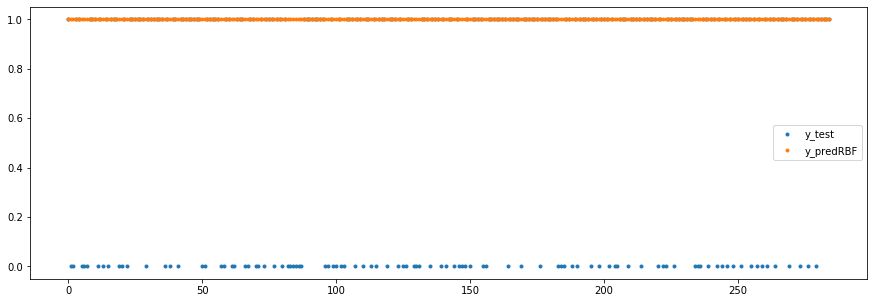

In [39]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.plot(y_predRBF,'.')
plt.legend(['y_test','y_predRBF'])

### Why did this happen? Lets plot the two output data(target and predicted) separately for clear observations

Text(0.5, 1.0, 'Target Values')

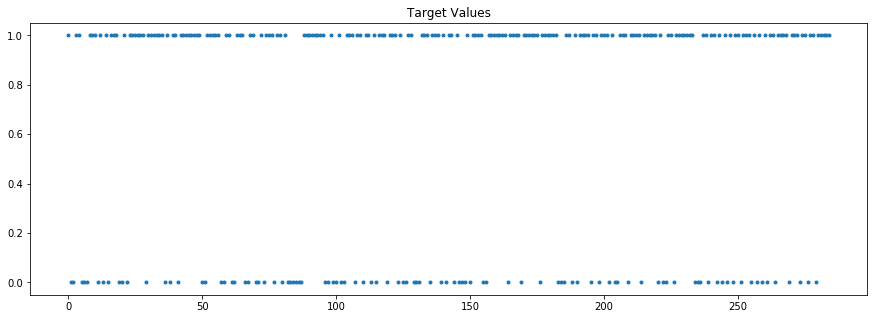

In [40]:
plt.figure(figsize=(15,5))
plt.plot(y_test,'.')
plt.title('Target Values')

Text(0.5, 1.0, 'Predicted Values')

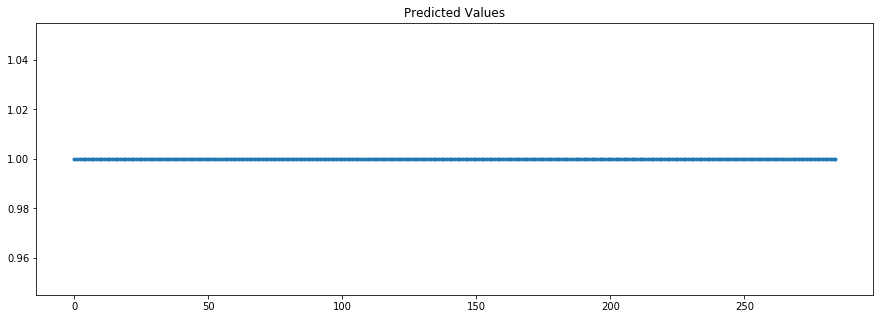

In [41]:
plt.figure(figsize=(15,5))
plt.plot(y_predRBF,'.')
plt.title('Predicted Values')

* Here we can see that by using RBF kernel for classifying the given data, we are getting comparitively lower accuracy. It is so because the model is working to predict only one class label. 

### Accuracy calculation for SVM using Default RBF Kernel : 

In [42]:
accuracyRBF=accuracy_score(y_test,y_predRBF)
accuracyRBF                        

0.656140350877193

In [43]:
print("Accuracy (test) for SVC with RBF kernel: %f%% " % (accuracyRBF * 100))

Accuracy (test) for SVC with RBF kernel: 65.614035% 


* Our machine Learning Model might behave badly if one of the features does not look like standardized distributed data. Since we have received a compartively lower accuracy, we need to standardize each of the features by calculating the mean and scaling to unit variance : 

### Importing Standar Scalar Library

In [44]:
from sklearn.preprocessing import StandardScaler

### Scaling and transforming each of the features(X) :

In [45]:
X = StandardScaler().fit_transform(X)

### Splitting the data from dataset into half each for training and testing data for building our model on scaled data: 

In [46]:
X_trainS, X_testS, y_trainS,y_testS=train_test_split(X,y, test_size=0.5,random_state=42)

In [47]:
X_trainS

array([[-0.13271749, -0.03715128, -0.10334759, ...,  0.39731943,
        -0.25359635,  0.24627802],
       [-1.0813249 , -0.68407594, -1.09809092, ..., -1.38251753,
        -0.35551653, -0.55170975],
       [ 1.08570341,  0.16763063,  0.91569797, ...,  0.05928897,
         3.2052186 , -1.26546548],
       ...,
       [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
        -0.33448538, -0.84042616]])

In [48]:
X_testS

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-1.20742721,  0.02567953, -1.1541096 , ..., -0.26062184,
        -0.45096559,  0.05287682],
       [-0.72630716, -0.05809488, -0.73191004, ..., -0.73036237,
         0.21717781, -0.06127977],
       [-0.51613665, -0.6445158 , -0.52637094, ..., -0.42643948,
        -0.45743671, -0.43533653]])

### Running Logistic Regression Classifier on scaled data :

In [49]:
lrc1=LogisticRegression(solver='liblinear').fit(X_trainS,y_trainS)
y_predS=lrc1.predict(X_testS)

In [50]:
y_predS

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

#### a) Target values :

Text(0.5, 1.0, 'Target Values')

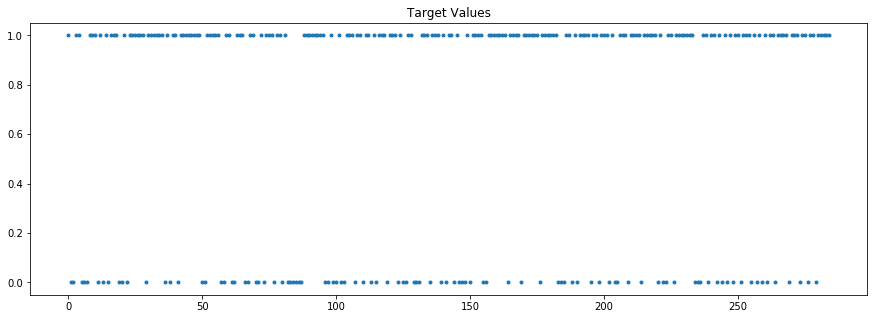

In [51]:
plt.figure(figsize=(15,5))
plt.plot(y_testS,'.')
plt.title('Target Values')

#### b) Predicted Values :

Text(0.5, 1.0, 'Predicted Values')

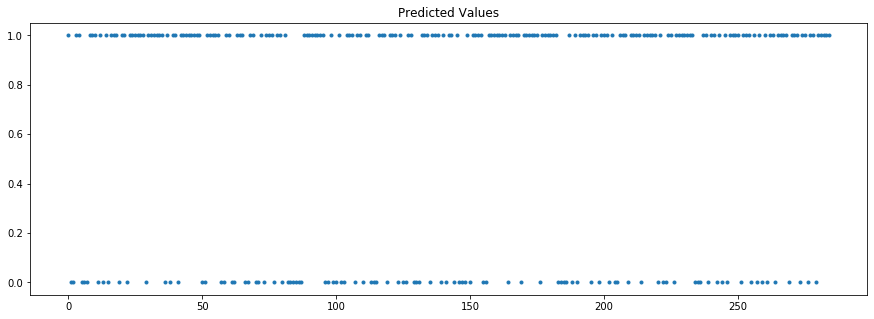

In [52]:
plt.figure(figsize=(15,5))
plt.plot(y_predS,'.')
plt.title('Predicted Values')

### Comparison of Predicted values and target values for Scaled test data :

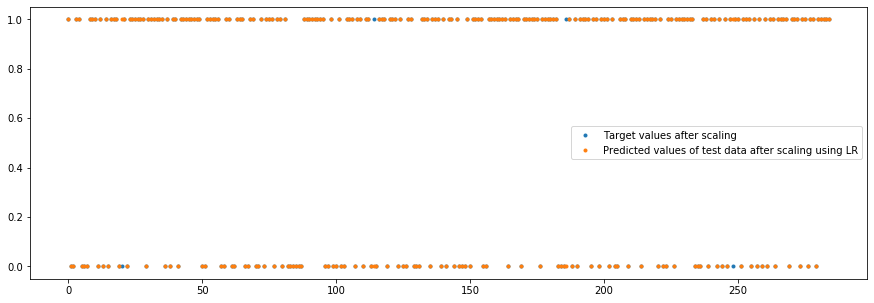

In [53]:
plt.figure(figsize=(15,5))
plt.plot(y_testS,'.')
plt.plot(y_predS,'.')
plt.legend(['Target values after scaling','Predicted values of test data after scaling using LR'])

* Here we can see the visualization of the target and predicted values

### Evaluation metrics for Scaled test Data 

In [54]:
accuracyLR=accuracy_score(y_testS, y_predS)
accuracyLR

0.9859649122807017

In [55]:
print("Accuracy (test) for Logisitic Regression after Scaling data: %0.1f%% " % (accuracyLR * 100))

Accuracy (test) for Logisitic Regression after Scaling data: 98.6% 


#### We can see that transforming and scaling  the data increased the accuracy increased by 3%.

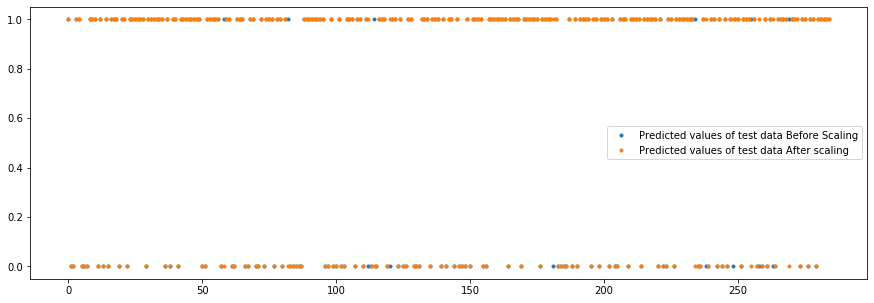

In [56]:
plt.figure(figsize=(15,5))
plt.plot(y_pred,'.')
plt.plot(y_predS,'.')
plt.legend(['Predicted values of test data Before Scaling','Predicted values of test data After scaling'])

### Similarly, running SVM using Linear Kernel on scaled data :

In [57]:
svcl1=svm.SVC(kernel='linear').fit(X_trainS,y_trainS)
y_predSVMS=svcl1.predict(X_testS)
y_predSVMS

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

#### a) Target Values :

Text(0.5, 1.0, 'Target Values')

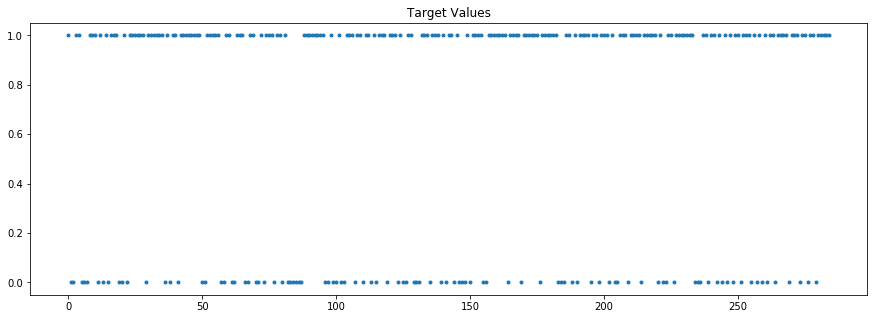

In [58]:
plt.figure(figsize=(15,5))
plt.plot(y_testS,'.')
plt.title('Target Values')

#### b) Predicted Values :

Text(0.5, 1.0, 'Predicted Values')

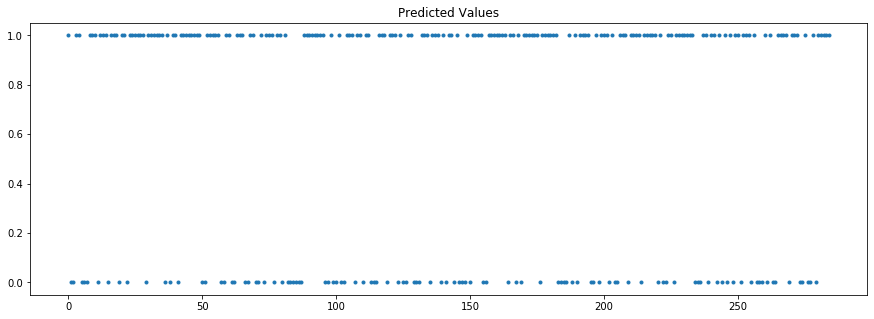

In [59]:
plt.figure(figsize=(15,5))
plt.plot(y_predSVMS,'.')
plt.title('Predicted Values')

### Comparison of predicted values and target values of scaled test data

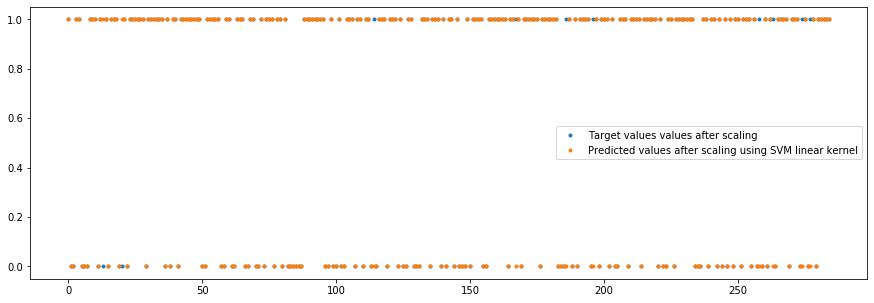

In [60]:
plt.figure(figsize=(15,5))
plt.plot(y_testS,'.')
plt.plot(y_predSVMS,'.')
plt.legend(['Target values values after scaling','Predicted values after scaling using SVM linear kernel'])

### Evaluation Metrics For Scaled Test data

In [61]:
accuracySVMS=accuracy_score(y_testS, y_predSVMS)
accuracySVMS

0.9649122807017544

In [62]:
print("Accuracy (test) for SVC with linear kernel using scaled data: %f%% " % (accuracySVMS * 100))

Accuracy (test) for SVC with linear kernel using scaled data: 96.491228% 


#### Very slight deviations in accuracy were observed in this case. But the overall accuracy remained high.

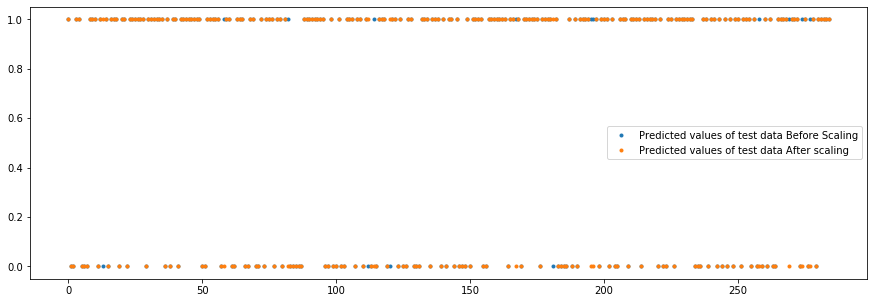

In [63]:
plt.figure(figsize=(15,5))
plt.plot(y_predSVM,'.')
plt.plot(y_predSVMS,'.')
plt.legend(['Predicted values of test data Before Scaling','Predicted values of test data After scaling'])

### Running SVM using Default RBF Kernel on scaled data :

In [64]:
svcrbf1=svm.SVC(gamma='auto').fit(X_trainS,y_trainS)
y_predRBFS=svcrbf1.predict(X_testS)
y_predRBFS

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

#### a) Target Values :

Text(0.5, 1.0, 'Target Values')

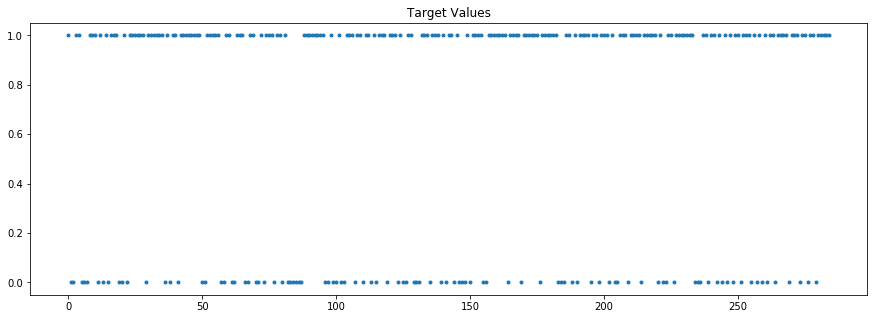

In [65]:
plt.figure(figsize=(15,5))
plt.plot(y_testS, '.')
plt.title('Target Values')

#### b) Predicted Values :

Text(0.5, 1.0, 'Predicted Values')

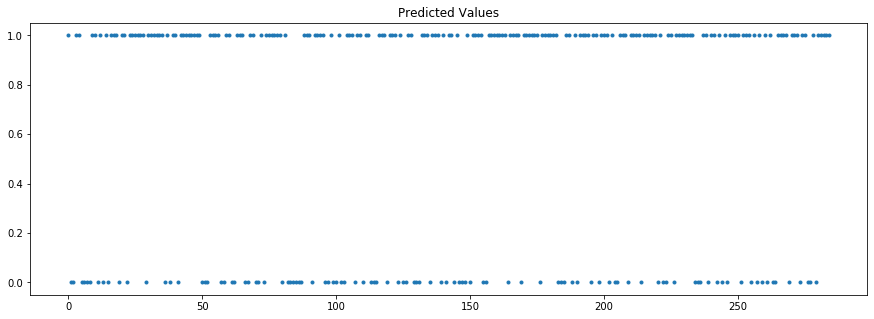

In [66]:
plt.figure(figsize=(15,5))
plt.plot(y_predRBFS,'.')
plt.title('Predicted Values')

### Comparison of predicted values and target values of scaled test data

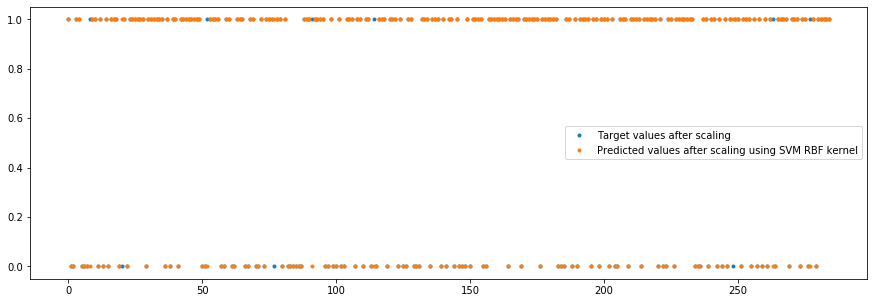

In [67]:
plt.figure(figsize=(15,5))
plt.plot(y_testS, '.')
plt.plot(y_predRBFS,'.')
plt.legend(['Target values after scaling','Predicted values after scaling using SVM RBF kernel'])

In [68]:
accuracyRBFS=accuracy_score(y_testS,y_predRBFS)
accuracyRBFS                        

0.968421052631579

In [69]:
print("Accuracy (test) for SVC with RBF kernel using scaled data: %f%% " % (accuracyRBFS * 100))

Accuracy (test) for SVC with RBF kernel using scaled data: 96.842105% 


#### Here we can see that the accuracy for Support Vector Classifier after scaling data increased to a greater extent from 65% to 96.8%

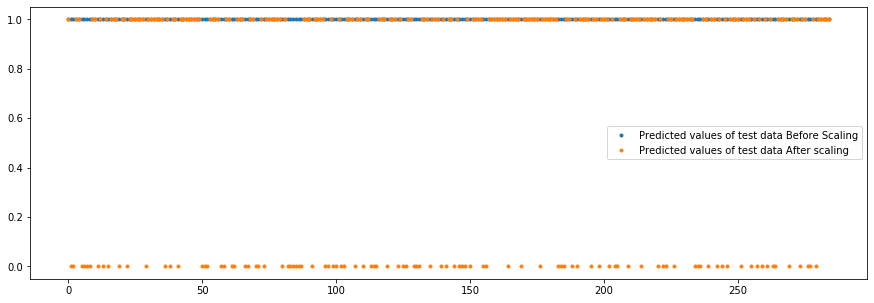

In [70]:
plt.figure(figsize=(15,5))
plt.plot(y_predRBF, '.')
plt.plot(y_predRBFS,'.')
plt.legend(['Predicted values of test data Before Scaling','Predicted values of test data After scaling'])

* Here we can see that after scaling the data, there was a lot of difference observed. Earlier our model did not predict both the class labels. But here after scaling and normalizing all data, it has predicted the other class label too correctly to a considerable extent. Thus the accuracy increased greatly using scaled data.

## Why did scaling increase the accuracy of predictions?

* Our Machine Learning Model might behave badly if one of the features does not look like standardized distributed data. We need to scale down all the data values to a particular scale from 0 to 1 so that we can avoid deviation and minimize the total error/loss in accuracy of predictions. We need to standardize each of the features by calculating the mean and scaling to unit variance. Hence after scaling and normalizing the given data, we can see that the accuracies of predicting the two class labels observed a considerable growth and obtained improved results.

### Tuning the parameters for each model using Grid SearchCV :

### 1] Logistic Regression Classifier:

In [71]:
parameters={'C':[0.1,1,9,12,15,20,47] }    #[0.1,1,15,37,52,87,98]}    
lrc3=LogisticRegression(solver='liblinear').fit(X_train,y_train)
gsLR = GridSearchCV(lrc3, parameters)
gsLR.fit(X_train, y_train)
gsLRpred=gsLR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Evaluation metrics for LR Classifer using Grid SearchCV :

In [72]:
accuracy_LR=gsLR.cv_results_['mean_test_score']
accuracy_LR=accuracy_LR*100
accuracy_LR

array([91.90140845, 94.36619718, 95.07042254, 95.07042254, 95.42253521,
       95.07042254, 95.07042254])

#### Here we found the mean test score of predictions using the LR classfier model after tuning the C parameter. The following graph shows the trends in prediction accuracies for different values of C.

### Relation between Regularization parameter C and corresponding estimated accuracy  :

Text(0.5, 0, 'Regularization Parameter C')

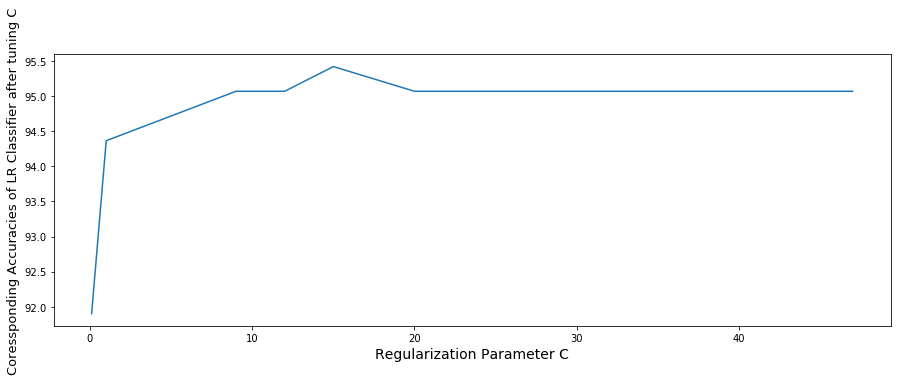

In [73]:
plt.figure(figsize=(15,5))
plt.plot([0.1,1,9,12,15,20,47],accuracy_LR)
         #[0.1,1,15,37,52,87,98])
         #[0.1,1,9,12,15,20,47])   
plt.ylabel('Coressponding Accuracies of LR Classifier after tuning C', fontsize=13)
plt.xlabel('Regularization Parameter C', fontsize=14)

* We can see that after tuning the regularization parameter C with different values, the prediction accuracy for unscaled data increased to a greater extent for smaller values of C parameter i.e for 0.01 to 1. However, as we go for higher values of C(above 1) a gradual linear growth in accuracy is observed. The highest prediction accuracy is observed when regularization parameter is 15 (95.42%). The accuracy again drops to 95.07% when we tune the C parameter with higher values than 15. The accuracies then remain constant for higher values for C.

### 2] SVC with Linear Kernel :

In [74]:
parameters={'kernel':['linear'],'C': [0.1,1,9,12,15,20,47]}
            #[0.1,1,9,15]}
svcL=svm.SVC().fit(X_train,y_train)
gsL = GridSearchCV(svcL, parameters, cv=3)
gsL.fit(X_train, y_train)
gsLpred = gsL.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Evaluation metrics for SV Classifer with Linear Kernel using Grid SearchCV :

In [75]:
accuracy_L=gsL.cv_results_['mean_test_score']
accuracy_L=accuracy_L*100
accuracy_L

array([94.01408451, 95.77464789, 95.42253521, 95.77464789, 95.42253521,
       95.77464789, 95.77464789])

#### Here we found the mean test score of predictions using the Support Vector Classfier model with Linear Kernel after tuning the C parameter. The following graph shows the trends in prediction accuracies for different values of C.

### Relation between Regularization parameter C and corresponding estimated accuracy  :

Text(0.5, 0, 'Regularization Parameter C')

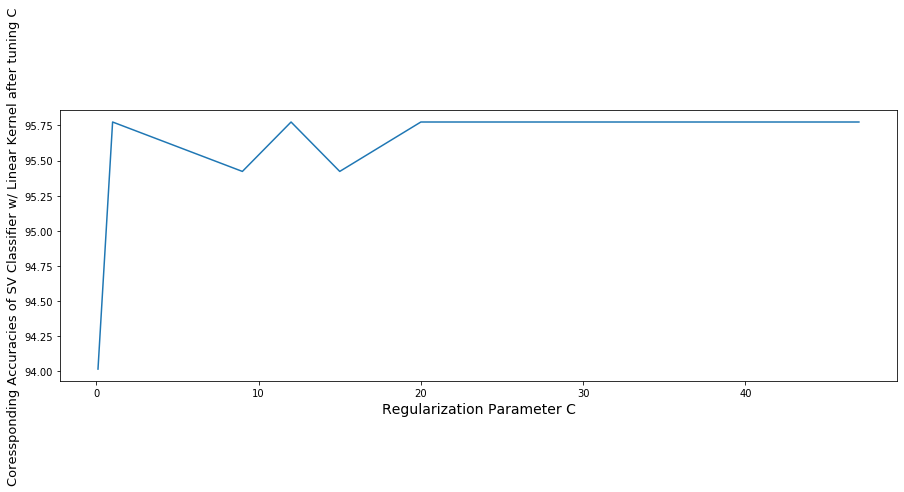

In [76]:
plt.figure(figsize=(15,5))
plt.plot([0.1,1,9,12,15,20,47],accuracy_L)
plt.ylabel('Coressponding Accuracies of SV Classifier w/ Linear Kernel after tuning C', fontsize=13)
plt.xlabel('Regularization Parameter C', fontsize=14)


* For SVC with Linear Kernel, we can see that when we tweak C parameter with different values, slight growth in increase of accuracy is observed for lower values of C that is when C is ranging from 0.1 to 1. However as we go for higher values of C parameter, the accuracy drops to 95.4% and then again increases till 95.77%. A drop is again observed for C between 15-20. For higher values of C than 20 however, the accuracy increases to 95.77% and then it remains constant. In this case for C=15, low accuracy is observed unlike LR classifier accuracy for C=15 which observed maximum accuracy at this value of C.

### 3] SVC using RBF Kernel :

#### A] Using Default gamma parameter "auto" and tweaking values of C :

In [77]:
parameters={'kernel':['rbf'],'C': [0.1,1,9,12,15,20,47]}
            #[0.1,1,9,15]}
svcRauto=svm.SVC(gamma='auto').fit(X_train,y_train)
gsRauto = GridSearchCV(svcRauto, parameters)
gsRauto.fit(X_train, y_train)
gsRautopred=gsRauto.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Evaluation metrics for SV Classifer with RBF Kernel using Grid SearchCV :

In [78]:
accuracy_Rauto=gsRauto.cv_results_['mean_test_score']
accuracy_Rauto=accuracy_Rauto*100
accuracy_Rauto

array([59.85915493, 59.85915493, 59.85915493, 59.85915493, 59.85915493,
       59.85915493, 59.85915493])

#### Here we found the mean test score of predictions using the Support Vector Classfier model with default RBF Kernel after tuning the C as well as the gamma parameter. The following graph shows the trends in prediction accuracies for different values of C using default gamma parameter.

### Relation between Regularization parameter C and corresponding estimated accuracy keeping gamma paramter default :

Text(0.5, 0, 'Regularization Parameter C with gamma ="auto"')

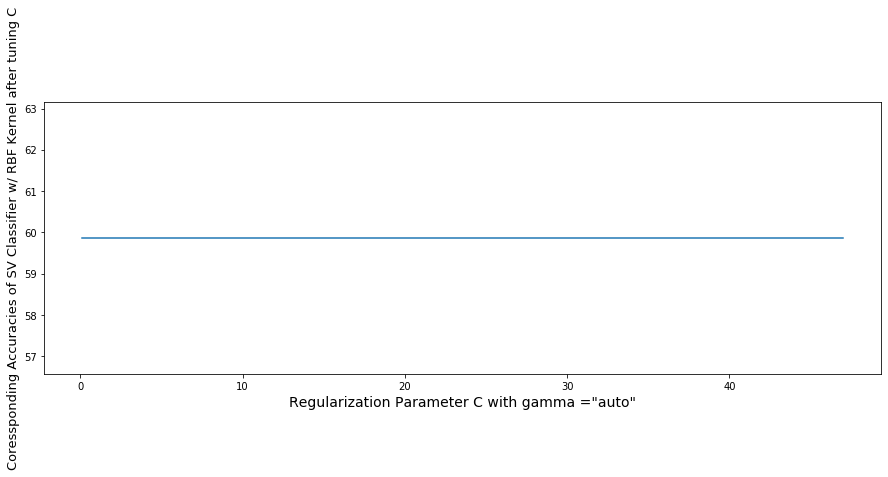

In [79]:
plt.figure(figsize=(15,5))
plt.plot([0.1,1,9,12,15,20,47],accuracy_Rauto)
         #[0.1,1,9,15])
plt.ylabel('Coressponding Accuracies of SV Classifier w/ RBF Kernel after tuning C', fontsize=13)
plt.xlabel('Regularization Parameter C with gamma ="auto"', fontsize=14)

* Here we can notice that by using GridSearchCV and inspite of tweaking the regularization parameter as well as the default gamma paramter(auto), the prediction accuracy of this model for given unscaled test data still remained constant throughout, that is 59.85%.No deviations and variations were observed in accuracy after tuning the C parameter when gamma parameter is default(auto).

#### B] Using gamma parameter "scale" and tweaking values of C :

In [80]:
parameters={'kernel':['rbf'],'C':[0.1,1,9,12,15,20,47]}
            #[0.1,1,9,15]}
svcRscale=svm.SVC(gamma='scale').fit(X_train,y_train)
gsRscale = GridSearchCV(svcRscale, parameters)
gsRscale.fit(X_train, y_train)
gsRscale_pred=gsRscale.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Evaluation metrics for SV Classifer with RBF Kernel using Grid SearchCV :

In [81]:
accuracy_Rscale=gsRscale.cv_results_['mean_test_score']
accuracy_Rscale=accuracy_Rscale*100
accuracy_Rscale

array([86.61971831, 89.08450704, 89.43661972, 89.43661972, 89.78873239,
       89.43661972, 90.14084507])

#### Here we found the mean test score of predictions using the Support Vector Classfier model with default RBF Kernel after tuning the C as well as the gamma parameter. The following graph shows the trends in prediction accuracies for different values of C and for gamma parameter "scale"

### Relation between Regularization parameter C and corresponding estimated accuracy changing gamma paramter to "scale" :

Text(0.5, 0, 'Regularization Parameter C with gamma ="scale"')

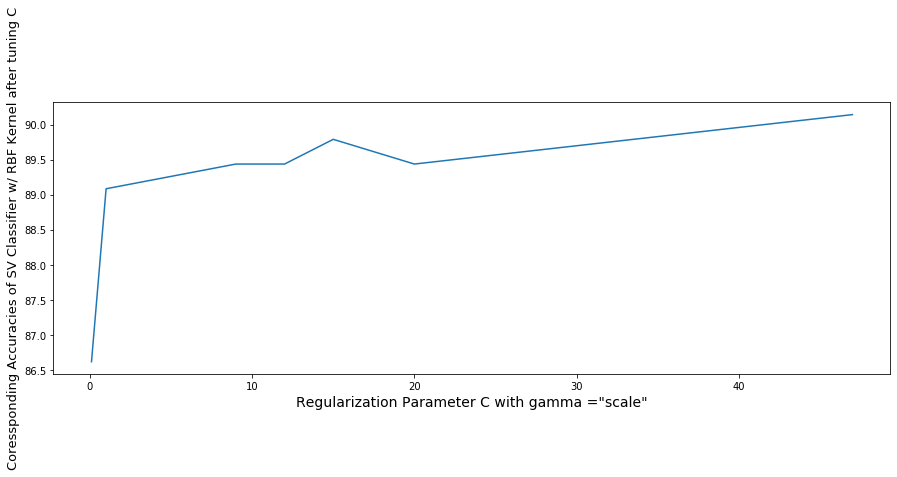

In [82]:
plt.figure(figsize=(15,5))
plt.plot([0.1,1,9,12,15,20,47],accuracy_Rscale)
         #[0.1,1,9,15])
plt.ylabel('Coressponding Accuracies of SV Classifier w/ RBF Kernel after tuning C', fontsize=13)
plt.xlabel('Regularization Parameter C with gamma ="scale"', fontsize=14)

* In the above graph we can see that by using GridSearchCV and tweaking the regularization parameter as well as the gamma paramter to 'scale', a considerable sudden linear growth in prediction accuracy of unscaled test data by SV classifier is observed for smaller values of C parameter that is from C=0.1 to C=1. However as we go for higher values of C, the prediction accuracy increases at a slower rate till it reaches 89.7% for C=15. A drop in prediction accuracy is observed at C=20. For higher values than C=20, the prediction accuracy of SV classifier using RBF Kernel observed a positive linear growth.

#### c] Tweaking the Gamma parameter keeping Regularization Parameter default :

In [83]:
parameters={'kernel':['rbf'],'C':[1],'gamma' : [0.0009,0.001,0.09,1,15,42,65,87,99]}
            #[0.1,1,9,15]}
svcRg1=svm.SVC().fit(X_train,y_train)
gsRg1 = GridSearchCV(svcRg1, parameters)
gsRg1.fit(X_train, y_train)
gsRg1_pred=gsRg1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Evaluation metrics for SV Classifer with RBF Kernel using Grid SearchCV :

In [84]:
accuracy_Rg1=gsRg1.cv_results_['mean_test_score']
accuracy_Rg1=accuracy_Rg1*100
accuracy_Rg1

array([90.14084507, 89.78873239, 59.85915493, 59.85915493, 59.85915493,
       59.85915493, 59.85915493, 59.85915493, 59.85915493])

#### Here we found the mean test score of predictions using the Support Vector Classfier model with default RBF Kernel after tuning the gamma parameter keeping C default. The following graph shows the trends in prediction accuracies for different values of gamma and for regularization parameter default (1) 

### Relation between gamma parameter and corresponding estimated accuracy keeping the regularization parameter default:

Text(0.5, 0, 'Gamma Paramter')

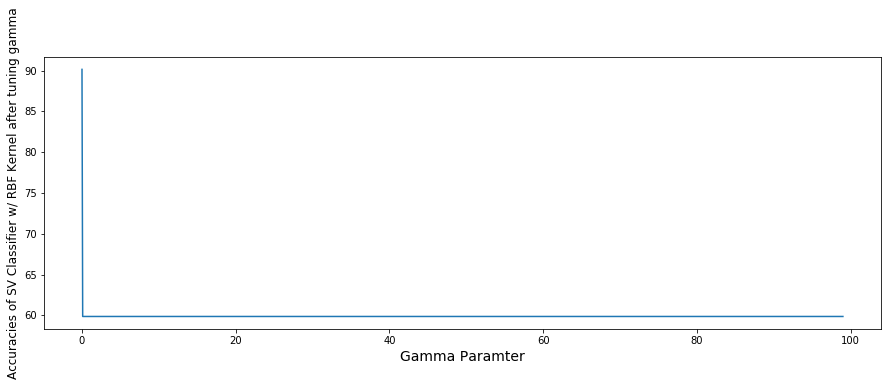

In [85]:
plt.figure(figsize=(15,5))
plt.plot([0.0009,0.001,0.09,1,15,42,65,87,99],accuracy_Rg1)
         #[0.1,1,9,15])
plt.ylabel('Accuracies of SV Classifier w/ RBF Kernel after tuning gamma', fontsize=12)
plt.xlabel('Gamma Paramter', fontsize=14)

* Here in the above graph we can see that for default Regularization Parameter, if we tune the gamma paramters maximum accuracy of predicting output labels using SV classifier model with RBF Kernel is observed for lower values of gamma, that is when gamma parameter is less than 1. The accuracy decreases drastically as we go for higher values of gamma and then remains constant.

#### d] Tweaking the Regularization Parameter as well as the Gamma parameter :

In [86]:
parameters={'kernel':['rbf'],'C':[15],'gamma' : [0.0009,0.001,0.09,1,15,42,65,87,99]}
            #[0.1,1,9,15]}
svcRg2=svm.SVC().fit(X_train,y_train)
gsRg2= GridSearchCV(svcRg2, parameters)
gsRg2.fit(X_train, y_train)
gsRg2_pred=gsRg2.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Here we found the mean test score of predictions using the Support Vector Classfier model with default RBF Kernel after tuning the gamma parameter and regularization parameter. The following graph shows the trends in prediction accuracies for different values of gamma and for regularization parameter C=15

#### Evaluation metrics for SV Classifer with RBF Kernel using Grid SearchCV :

In [87]:
accuracy_Rg2=gsRg2.cv_results_['mean_test_score']
accuracy_Rg2=accuracy_Rg2*100
accuracy_Rg2

array([90.14084507, 89.78873239, 59.85915493, 59.85915493, 59.85915493,
       59.85915493, 59.85915493, 59.85915493, 59.85915493])

### Relation between gamma parameter and corresponding estimated accuracy changing the regularization parameter:

Text(0.5, 0, 'Gamma Paramter')

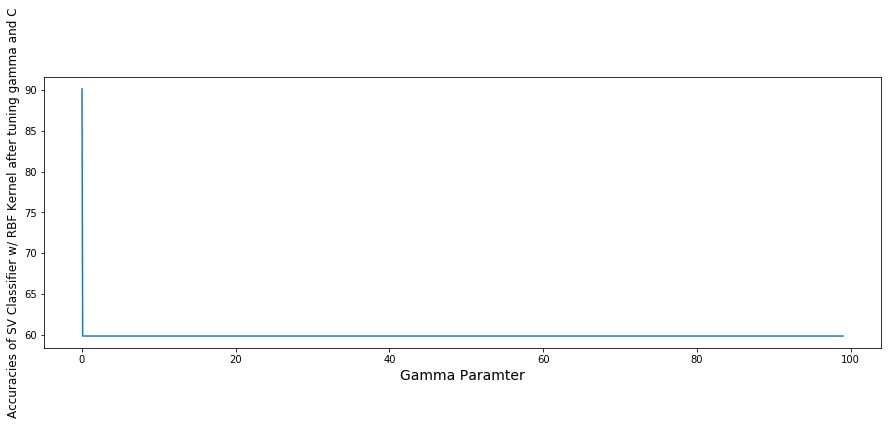

In [88]:
plt.figure(figsize=(15,5))
plt.plot([0.0009,0.001,0.09,1,15,42,65,87,99],accuracy_Rg2)
         #[0.1,1,9,15])
plt.ylabel('Accuracies of SV Classifier w/ RBF Kernel after tuning gamma and C', fontsize=12)
plt.xlabel('Gamma Paramter', fontsize=14)

* In the above graph, we can see that when we changed the regularization parameter to 15, highest accuracy is observed for lowest value of gamma. As we increase the gamma parameter for same regularization parameter, the accuracy observes a steep slope and observes a great fall for higher values of gamma. Thereafter, the value for accuracy remains constant for greater values of gamma. 

### Important features for LR Classifier :

In [89]:
lrc1.intercept_

array([0.07655827])

* The intercept parameter returns a value called as a Bias Term which is simply a real number that contributes along with weighted feautres towards weighted sum of evidence of class.

In [90]:
lrc1.coef_

array([[-0.28494029, -0.35342678, -0.26745518, -0.34467242,  0.03571271,
         0.70134251, -0.66588747, -0.94856491,  0.03046227,  0.19287708,
        -1.19597257,  0.09522883, -0.67765414, -0.88709531, -0.12555991,
         0.47273005, -0.129349  , -0.48793663,  0.50154479,  0.63806999,
        -0.67599513, -1.01159213, -0.50924212, -0.66364068, -0.57517373,
         0.06327601, -0.76769912, -0.98433042, -1.16525054, -0.11014366]])

* There are 30 features in ths given dataset. The coefficient parameter returns a vector of weights associated with each of these features which tells how important the feature X is to the classification decision. 

* High Positive values and high negative values of the coefficient imply that they are the important features in classifying the given data in two given classes.

* Here the sixth feature : 'mean_compactness' has the maximum positive weight and the feature : 'radius_error' has maximum negative weight which contribute the most in classifying the data into 2 class labels malignant and benign. 


### Important Features for SVC with linear Kernel :

In [91]:
svcl1.intercept_ 

array([0.08462888])

* The intercept parameter returns a value called as a Bias Term which is simply a real number that contributes along with weighted feautres towards weighted sum of evidence of class.

In [92]:
svcl1.coef_

array([[-0.18778202, -0.06370942, -0.19382672, -0.21357456,  0.25030709,
         0.82236275, -0.41398671, -0.74998811, -0.20627661, -0.02486211,
        -0.72854556,  0.35738194, -0.33148128, -0.68683803, -0.03130224,
         0.26205836, -0.25222985, -0.68144659,  0.52770571,  0.56167937,
        -0.3763945 , -1.01372688, -0.25051656, -0.4675872 , -0.33646359,
         0.32825631, -0.53968421, -0.64305797, -0.99628593, -0.2150205 ]])

* There are 30 features in ths given dataset. The coefficient parameter returns a vector of weights associated with each of these features which tells how important the feature X is to the classification decision. 

* High Positive values and high negative values of the coefficient imply that they are the important features in classifying the given data in two given classes.

* Here the sixth feature : 'mean_compactness' has the maximum positive weight and the feature : 'worst_texture' has maximum negative weight which contribute the most in classifying the data into 2 class labels malignant and benign. 
